<a href="https://colab.research.google.com/github/Armeldjogo/NLP/blob/main/NLP_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Armel Nsiangani

Student ID#: 001-99-1988

NLP - HW4

In [ ]:
# Downloading packages
%matplotlib inline
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
import tensorflow_hub as hub
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.feature_extraction.text import CountVectorizer # Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.naive_bayes import MultinomialNB # Bayes
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.svm import SVC # SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import sklearn.metrics 
from sklearn.metrics import confusion_matrix
import sklearn.metrics 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')
# Random seed
from numpy.random import seed
seed(2361)
# For LSTM 
!pip install numpy==1.16.2
# All the imports!
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
from sklearn.metrics import classification_report
# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     |████████████████████████████████| 17.3MB 191kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.16.2 which is incompatible.
ERROR: pyarrow 3.0.0 has requirement numpy>=1.16.6, but you'll have numpy 1.16.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.2 has requirement numpy>=1.17, but you'll have numpy 1.16.2 which is incompatible.
ERROR: al

In [ ]:
# Preprocessing data
# Unzip files
import zipfile
path_to_zip_file = "/content/trainingandtestdata.zip"
directory_to_extract_to = "/content/"
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# Renaming the file
import os
os.rename(r'/content/training.1600000.processed.noemoticon.csv',r'/content/training.csv')
os.rename(r'/content/testdata.manual.2009.06.14.csv',r'/content/testing.csv')

# Downloading data 
all_data_training = pd.read_csv(r"/content/training.csv", encoding = "ISO-8859-1")
all_data_training.columns=['Polarity','ID','Date','Query','User Name','Tweet text']

# Retrieve pos. & neg. tweets only
pd.set_option('display.max_columns', None)
data_N = all_data_training[all_data_training['Polarity'] == 0] # Negative tweets
data_P = all_data_training[all_data_training['Polarity'] == 4] # Positive tweets
neg_pos_data = all_data_training[(all_data_training['Polarity'] == 0) | (all_data_training['Polarity'] == 4)]

Q1. Take the positive and the negative tweets only. Use Sklearn to split the dataset in 80% training, 20% testing splits.

In [ ]:
# Question 1
# Splitting data 80% - training & 20% - testing
train, test = train_test_split(neg_pos_data, train_size= 0.8, test_size = 0.2)

# Displaying the data
print('Training set: ', )
print('Size of set: ', train.shape)
print(train.head())

print()
print('------------------------------------------------------------------------')
print()

print('Testing set: ', )
print('Size of set: ', test.shape)
print(test.head())

Training set: 
Size of set:  (1279999, 6)
         Polarity          ID                          Date     Query  \
1327068         4  2015337727  Wed Jun 03 04:23:32 PDT 2009  NO_QUERY   
867725          4  1677825654  Sat May 02 04:11:28 PDT 2009  NO_QUERY   
191053          0  1969494674  Sat May 30 00:12:53 PDT 2009  NO_QUERY   
266955          0  1989094615  Mon Jun 01 00:19:41 PDT 2009  NO_QUERY   
1472944         4  2065462631  Sun Jun 07 08:38:46 PDT 2009  NO_QUERY   

             User Name                                         Tweet text  
1327068        DCBrent  @MarkDC Okay, no probs if you can't.  Just pla...  
867725     PRMurphy147  @nobodysnews LOL, it was more like the sound o...  
191053   rockerchick99  @gregstrong Emery is amazing! Sadly I have yet...  
266955          Tripzy  @soBOMB my phone died on u  sorry lol and i ca...  
1472944          kulit  loves that there's so much Federer love going ...  

--------------------------------------------------------------

 Q2. Use the code from the previous classes to build the following models (15 points):

In [ ]:
# Question 2
# Function to return models
def createModels(classAlgName,vectorMethod,trainingSet):
  # create model
  model = make_pipeline(vectorMethod, classAlgName)
  # fit model
  model.fit(trainingSet['Tweet text'], trainingSet[['Polarity']].values)
  return model

# Model : SVM using TF-IDF, Naive Bayes using TF-IDF, Random Forest using TF-IDF
model_1 = createModels(LinearSVC(),TfidfVectorizer(),train) # SVM using TF-IDF
model_2 = createModels(MultinomialNB(),TfidfVectorizer(),train) # Naive Bayes using TF-IDF
#model_3 = createModels(RandomForestClassifier(),TfidfVectorizer(),train) #Random Forest using TF-IDF

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Tesing the models performance

# SVM using TF-IDF
test_vals = test[['Polarity']].values
labels_1 = model_1.predict(test['Tweet text'])

print('Results SVM using TF-IDF')
print('-------------------------------')
print('Precision:', sklearn.metrics.precision_score(test_vals,labels_1,average="binary", pos_label= 4))
print('Recall:', sklearn.metrics.recall_score(test_vals,labels_1,average="binary", pos_label= 4))
print('F1 Score:', sklearn.metrics.f1_score(labels_1, test_vals, average='macro'))


Results SVM using TF-IDF
-------------------------------
Precision: 0.79442089124214
Recall: 0.7998725023905802
F1 Score: 0.7964350770685049


In [ ]:
# Naive Bayes using TF-IDF
labels_2 = model_2.predict(test['Tweet text'])

print('Results Naive Bayes using TF-IDF')
print('---------------------------------')
print('Precision:', sklearn.metrics.precision_score(test_vals,labels_2,average="binary", pos_label= 4))
print('Recall:', sklearn.metrics.recall_score(test_vals,labels_2,average="binary", pos_label= 4))
print('F1 Score:', sklearn.metrics.f1_score(labels_2, test_vals, average='macro'))

Results Naive Bayes using TF-IDF
---------------------------------
Precision: 0.8012933649550493
Recall: 0.7263988800209996
F1 Score: 0.7726319283754856


Q3. Use the code from the LSTM class to build a classifier for negative and positive
sentiment tweets. Train the model with the training data split. 

In [ ]:
# Padding the DataFrames
# The length of reviews
tweet_length = 500
# Padding the training data
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['Tweet text'].values)
word_index = tokenizer.word_index
x_train = tokenizer.texts_to_sequences(train['Tweet text'].values)
x_train = sequence.pad_sequences(x_train, maxlen= tweet_length)

# Building the model
vocab_size = len(word_index) + 1
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = tweet_length # Length of input sequences
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

print('LSTM class summary')
model.summary()

LSTM class summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           19045152  
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 19,053,505
Trainable params: 19,053,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create the model
y_train = np.array(train[['Polarity']].values)
y_train[ y_train== 4] = 1

model.fit(x_train,y_train,batch_size=1024,epochs=3, validation_split=0.2,verbose=1)

Epoch 1/3
1000/1000 [==============================] - 382s 351ms/step - loss: 0.5136 - accuracy: 0.7425 - val_loss: 0.4101 - val_accuracy: 0.8129
Epoch 2/3
1000/1000 [==============================] - 348s 348ms/step - loss: 0.3687 - accuracy: 0.8363 - val_loss: 0.4128 - val_accuracy: 0.8125
Epoch 3/3
1000/1000 [==============================] - 350s 350ms/step - loss: 0.2971 - accuracy: 0.8739 - val_loss: 0.4382 - val_accuracy: 0.8046


In [ ]:
# Display performance
# Padding the data
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(test['Tweet text'].values)
word_index = tokenizer.word_index
x_test = tokenizer.texts_to_sequences(test['Tweet text'].values)
x_test = sequence.pad_sequences(x_test, maxlen= tweet_length)
y_test = np.array(test[['Polarity']].values)
y_test[ y_test == 4] = 1

# Labelling scores
class_names = ["Negative", "Positive"]

# Printing results
predicted_classes = model.predict_classes(x_test)
LSTM_report = classification_report(y_test, predicted_classes, target_names=class_names)
print('Performance: LSTM')
print(LSTM_report)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Performance: LSTM
              precision    recall  f1-score   support

    Negative       0.54      0.58      0.56    159997
    Positive       0.55      0.51      0.53    160003

    accuracy                           0.55    320000
   macro avg       0.55      0.55      0.55    320000
weighted avg       0.55      0.55      0.55    320000



Question: What can you say about the performance of this model?

Surprisingly, the performance of the LSTM appears to be lower than the other models. Additionally, the scores for precision, recall, and f1 appear to be very similar. 

Q4. Compare all models together in terms of Precision, Recall and F1 score. Put all of these numbers in a nicely formatted dataframe. 

In [ ]:
# Question 4
# Precision 
P_1 = sklearn.metrics.precision_score(test_vals,labels_1,average="binary", pos_label= 4) # SVM
P_2 = sklearn.metrics.precision_score(test_vals,labels_2,average="binary", pos_label= 4) # NB
P_3 = LSTM_report[0:][291:296]

prec = [P_1, P_2, P_3]

# Recall
R_1 = sklearn.metrics.recall_score(test_vals,labels_1,average="binary", pos_label= 4)
R_2 = sklearn.metrics.recall_score(test_vals,labels_2,average="binary", pos_label= 4)
R_3 = LSTM_report[0:][301:305]

rec = [R_1, R_2, R_3]

# F-1 score 
F_1 = sklearn.metrics.f1_score(labels_1, test_vals, average='macro')
F_2 = sklearn.metrics.f1_score(labels_2, test_vals, average='macro')
F_3 = LSTM_report[0:][311:315]

f1_score = [F_1, F_2, F_3]

model_name = ['SVM', 'Naive Bayes', 'LSTM']

# Create a DataFrame 
print('Review of Models')
dataFrame_with_scores = pd.DataFrame({"model name": model_name, "precision": prec, "recall":rec, "f1_score":f1_score})

print(dataFrame_with_scores)

Review of Models
    model name precision    recall  f1_score
0          SVM  0.794421  0.799873  0.796435
1  Naive Bayes  0.801293  0.726399  0.772632
2         LSTM     0.55       0.55      0.55


Which model performs the best? 

According to the results above, SVM using TF-IDF

Why do you think this is? 

The reason why I am choosing SVM is because it's overall score for precision, recall, and f1 is about 0.8, which is higher than any other models.

What do you think you can do to improve performance?

Here, the analysis was done without adequate pre-processing steps. I believe the performance can be improved by processing the data (e.g. removing stopwords) before creating the models, and prediting the model results.

Q5. Add to the comparison of #4 a the manually calculated precision, recall and F1 score using VADER and their suggested defaults to categorize the test split tweets in positive or negative.

In [ ]:
# Question 5
# Get sentiment score - Using VADER
sentiment_score = []
tweets = neg_pos_data['Tweet text'].values

for word in tweets:
  sia = SIA()
  scores = sia.polarity_scores(word)
  sentiment_score.append(scores)

x = sentiment_score

In [ ]:
# Labeled Positive vs Negative
match_neg = 0
mismatch_neg = 0
match_pos = 0
mismatch_pos = 0
comp_score_pos = []
comp_score_neg = []
# Negative section
for i in range(0,len(data_N)):
  comp_score_neg.append(x[i]['compound'])
  if comp_score_neg[i] <= -0.05:
    match_neg += 1
  else:
    mismatch_neg += 1
# Positive section
k = 0
for i in range(len(data_N),len(neg_pos_data)):
  comp_score_pos.append(x[i]['compound'])
  if comp_score_pos[k] >= 0.05:
    match_pos += 1
  else:
    mismatch_pos += 1
  k += 1

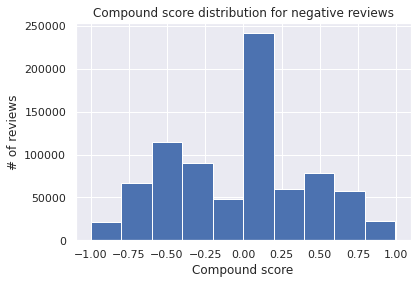

Figure 1


In [ ]:
# Printing results
# Negative results
y = comp_score_neg
x = range(0,len(comp_score_neg))
plt.hist(y) 
plt.title('Compound score distribution for negative tweets')
plt.xlabel('Compound score')
plt.ylabel('# of reviews')
plt.show()
print('Figure 1')

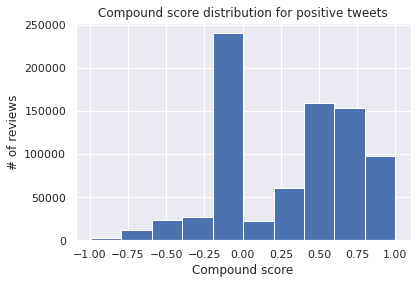

Figure 2


In [ ]:
# Positive results
y = comp_score_pos
x = range(0,len(comp_score_pos))
plt.hist(y) 
plt.title('Compound score distribution for positive tweets')
plt.xlabel('Compound score')
plt.ylabel('# of reviews')
plt.show()
print('Figure 2')

In [ ]:
# Computing Precision, Recall and F1 score
# Precision TP/(TP + FP):
prec_VADER = match_pos/ (match_pos + mismatch_neg)

# recall TP/(TP + FN)
rec_VADER = match_pos/ (match_pos + mismatch_pos)

# F1 score 2*Prec*Recall/(Prec + Recall)
f1_VADER = 2*prec_VADER*rec_VADER/(prec_VADER + rec_VADER)

In [ ]:
# Updated Q4 Table 
prec.append(prec_VADER)
rec.append(rec_VADER)
f1_score.append(f1_VADER)
model_name.append('VADER')

# Create a DataFrame 
print('Review of Models')
dataFrame_with_scores = pd.DataFrame({"model name": model_name, "precision": prec, "recall":rec, "f1_score":f1_score})

print(dataFrame_with_scores)

Review of Models
    model name precision    recall  f1_score
0          SVM  0.794421  0.799873  0.796435
1  Naive Bayes  0.801293  0.726399  0.772632
2         LSTM     0.55       0.55      0.55
3        VADER  0.514112  0.615003   0.56005


Question:
Is this approach as good as the previous
ones? Why do you think this is?

Looking at the performance results, i do not think that VADER is as good as the other methods. In fact, its scores are one of the lowest on the performance table. This is probably due to its intrinsic methodological steps.

Bonus: 

Try the following things to improve the LSTM model:


1) Use 90% training data, 10% testing


2) Remove stopwords from the tweets.


3) Remove all user mentions for the tweets (@something)

In [ ]:
# Bonus
# 1 - 90% training | 10% testing

train_1, test_1 = train_test_split(neg_pos_data, train_size= 0.9, test_size = 0.1)
tweet_length = 500


# Padding the training data
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_1['Tweet text'].values)
word_index = tokenizer.word_index
x_train_1 = tokenizer.texts_to_sequences(train_1['Tweet text'].values)
x_train_1 = sequence.pad_sequences(x_train_1, maxlen= tweet_length) 


y_train_1 = np.array(train_1[['Polarity']].values)
y_train_1[ y_train_1== 4] = 1

model.fit(x_train_1,y_train_1,batch_size=256,epochs=3, validation_split=0.2,verbose=1) # batch size original = 256

# Display performance
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(test_1['Tweet text'].values)
word_index = tokenizer.word_index
x_test_1 = tokenizer.texts_to_sequences(test_1['Tweet text'].values)
x_test_1 = sequence.pad_sequences(x_test_1, maxlen= tweet_length)

y_test_1 = np.array(test_1[['Polarity']].values)
y_test_1[ y_test_1 == 4] = 1

# Labelling scores
class_names = ["Negative", "Positive"]

# Printing results
predicted_classes_1 = model.predict_classes(x_test_1)
LSTM_report = classification_report(y_test_1, predicted_classes_1, target_names=class_names)
print('Performance: LSTM - 90/10 splitting data')
print(LSTM_report)


Epoch 1/3
4500/4500 [==============================] - 1008s 217ms/step - loss: 0.4686 - accuracy: 0.7746 - val_loss: 0.3955 - val_accuracy: 0.8205
Epoch 2/3
4500/4500 [==============================] - 983s 218ms/step - loss: 0.3456 - accuracy: 0.8489 - val_loss: 0.4092 - val_accuracy: 0.8150
Epoch 3/3
4500/4500 [==============================] - 978s 217ms/step - loss: 0.2745 - accuracy: 0.8860 - val_loss: 0.4312 - val_accuracy: 0.8096


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Performance: LSTM - 90/10 splitting data
              precision    recall  f1-score   support

    Negative       0.56      0.56      0.56     80156
    Positive       0.56      0.56      0.56     79844

    accuracy                           0.56    160000
   macro avg       0.56      0.56      0.56    160000
weighted avg       0.56      0.56      0.56    160000



In [ ]:
# 2 - Remove stopwords from the tweets

def returnFilteredToken(reviews):
  stop_words = set(stopwords.words('english')) 
  filter_rev = []
  for word in reviews:
    word_t = word_tokenize(word)
    filtered_word = [w for w in word_t if not w in stop_words]
    filter_rev.append(filtered_word)  
  return filter_rev

data_filtered = returnFilteredToken(neg_pos_data['Tweet text'])

# Data Frame after removing stopwords
def returnListOfString(s):
  s_new = []
  for i in s:
    l_2_str = ' '.join([str(elem) for elem in i]) 
    s_new.append(l_2_str)
  return s_new

# Array for polarity
pol = np.array(neg_pos_data[['Polarity']].values)
array_pol = []
for i in range(0,len(pol)):
  array_pol.append(pol[i][0])

data_filtered_n = returnListOfString(data_filtered)
all_data_filt = pd.DataFrame({"Polarity": array_pol,"Tweet text": data_filtered_n}) 

# Model & Performance

train_2, test_2 = train_test_split(all_data_filt, train_size= 0.9, test_size = 0.1)
tweet_length = 500


# Padding the training data
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_2['Tweet text'].values)
word_index = tokenizer.word_index
x_train_2 = tokenizer.texts_to_sequences(train_2['Tweet text'].values)
x_train_2 = sequence.pad_sequences(x_train_2, maxlen= tweet_length) 


y_train_2 = np.array(train_2[['Polarity']].values)
y_train_2[ y_train_2== 4] = 1

model.fit(x_train_2,y_train_2,batch_size=256,epochs=3, validation_split=0.2,verbose=1) 

# Display performance
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(test_2['Tweet text'].values)
word_index = tokenizer.word_index
x_test_2 = tokenizer.texts_to_sequences(test_2['Tweet text'].values)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen= tweet_length)

y_test_2 = np.array(test_2[['Polarity']].values)
y_test_2[ y_test_2 == 4] = 1

# Labelling scores
class_names = ["Negative", "Positive"]

# Printing results
predicted_classes_2 = model.predict_classes(x_test_2)
LSTM_report = classification_report(y_test_2, predicted_classes_2, target_names=class_names)
print('Performance: LSTM - Stopword removed')
print(LSTM_report)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Performance: LSTM - Stopword removed
              precision    recall  f1-score   support

    Negative       0.54      0.56      0.55     80143
    Positive       0.54      0.52      0.53     79857

    accuracy                           0.54    160000
   macro avg       0.54      0.54      0.54    160000
weighted avg       0.54      0.54      0.54    160000



In [ ]:
# 3 - Remove user mention
def returnFilteredToken(reviews):
  stop_words = set(stopwords.words('english')) 
  filter_rev = []
  for word in reviews:
    word_t = word_tokenize(word)
    filtered_word = [w for w in word_t if not w in stop_words]
    filter_rev.append(filtered_word)  
  return filter_rev

data_filtered = returnFilteredToken(neg_pos_data['Tweet text']) 

number_of_empty = 0
# Removing all user metion (@ something)
for i in range(0,len(data_filtered)):
  if not data_filtered[i]:
    number_of_empty += 1
  else:
    if data_filtered[i][0] == '@':
      del data_filtered[i][0]
      del data_filtered[i][0]

# Data Frame after removing stopwords
def returnListOfString(s):
  s_new = []
  for i in s:
    l_2_str = ' '.join([str(elem) for elem in i]) 
    s_new.append(l_2_str)
  return s_new

# Array for polarity
pol = np.array(neg_pos_data[['Polarity']].values)
array_pol = []
for i in range(0,len(pol)):
  array_pol.append(pol[i][0])

data_filtered_n = returnListOfString(data_filtered)
all_data_filt = pd.DataFrame({"Polarity": array_pol,"Tweet text": data_filtered_n}) 

# Model & Performance

train_2, test_2 = train_test_split(all_data_filt, train_size= 0.9, test_size = 0.1)
tweet_length = 500


# Padding the training data
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_2['Tweet text'].values)
word_index = tokenizer.word_index
x_train_2 = tokenizer.texts_to_sequences(train_2['Tweet text'].values)
x_train_2 = sequence.pad_sequences(x_train_2, maxlen= tweet_length)


y_train_2 = np.array(train_2[['Polarity']].values)
y_train_2[ y_train_2== 4] = 1 

model.fit(x_train_2,y_train_2,batch_size=256,epochs=3, validation_split=0.2,verbose=1)

# Display performance
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(test_2['Tweet text'].values)
word_index = tokenizer.word_index
x_test_2 = tokenizer.texts_to_sequences(test_2['Tweet text'].values)
x_test_2 = sequence.pad_sequences(x_test_2, maxlen= tweet_length)

y_test_2 = np.array(test_2[['Polarity']].values)
y_test_2[ y_test_2 == 4] = 1

# Labelling scores
class_names = ["Negative", "Positive"]

# Printing results
predicted_classes_2 = model.predict_classes(x_test_2)
LSTM_report = classification_report(y_test_2, predicted_classes_2, target_names=class_names)
print('Performance: LSTM - User mentioned removed')
print(LSTM_report)

Epoch 1/3
4500/4500 [==============================] - 710s 151ms/step - loss: 0.4910 - accuracy: 0.7604 - val_loss: 0.4334 - val_accuracy: 0.7975
Epoch 2/3
4500/4500 [==============================] - 673s 149ms/step - loss: 0.4040 - accuracy: 0.8148 - val_loss: 0.4325 - val_accuracy: 0.7997
Epoch 3/3
4500/4500 [==============================] - 673s 150ms/step - loss: 0.3675 - accuracy: 0.8349 - val_loss: 0.4421 - val_accuracy: 0.7970


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Performance: LSTM - User mentioned removed
              precision    recall  f1-score   support

    Negative       0.54      0.55      0.55     80143
    Positive       0.54      0.54      0.54     79857

    accuracy                           0.54    160000
   macro avg       0.54      0.54      0.54    160000
weighted avg       0.54      0.54      0.54    160000



 Did this change the results in any way? 
 No, the LSTM performance did not significantly improved for 90-10 dataset, without stopwords, or after removing the tweets mention.


 Why do you think so?
 Becuase LSTM uses a recurrent neural method, that repeatedly process the data. So, the results is the most accurate results, regardless of additional pre-processing steps.